In [406]:
#Vraag 1
import scipy.stats as stats
from scipy.stats import norm
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#avg = 64
#std = 8

#P(Z > a) = 0.7

print("Hij moet minstens ", stats.norm.ppf(1 - 0.7, 64, 8), " halen")


Hij moet minstens  59.804795898335676  halen


In [407]:
#Vraag 1 b

print(((1 - stats.norm.cdf(72, 64, 8)) * 100), "% van de kanditaten behalen een hogere score")

15.865525393145708 % van de kanditaten behalen een hogere score


In [408]:
games = pd.read_csv('Video_Games_Sales.csv')

In [409]:
#Vraag 2
platform = games.Platform
games.Platform.value_counts()

#Antwoord: Er zijn 31 Platformen

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

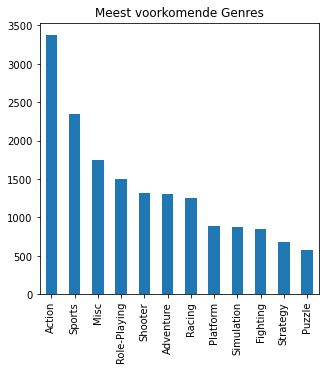

In [410]:
#Vraag 3
bar_data = games.Genre.value_counts()
bar_plot = bar_data.plot.bar(title = 'Meest voorkomende Genres', figsize=(5,5))

In [411]:
#Antwoord: De 5 meest voorkomende Genres zijn Action, Sports, Misc, Role-Playing, en Shooter

<AxesSubplot:title={'center':'Critic_Score'}, xlabel='Rating'>

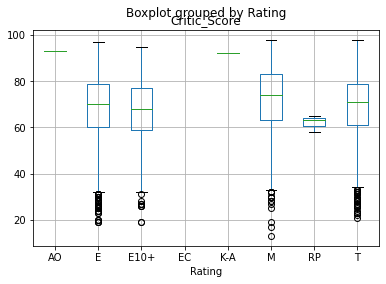

In [412]:
#Vraag 4
games[games.Rating.notnull()].boxplot('Critic_Score', 'Rating')

In [413]:
#Bespreking
#Er zou wel een verband kunnen zijn. Aan de hand van de bovenste data kunnen we zien dat Ratings zoals E, E10+, M, en T
#een hoge critic score krijgen meestal, terwijl Ratings zoals EC, K-A, en RP vaak minder interssant zijn, en daardoor
#een lagere of zelfs geen Critic_Score krijgen.

(-2.0, 2.0)

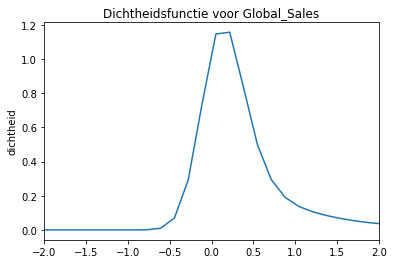

In [414]:
#Vraag 5

games.Global_Sales.plot(kind = 'kde', title = 'Dichtheidsfunctie voor Global_Sales')
plt.ylabel("dichtheid")
ax = plt.gca() #Get the Current Axes
ax.set_xlim(-2, 2)

In [415]:
#Antwoord: De dichtheid van Global_Sales is een beetje rechtsscheef

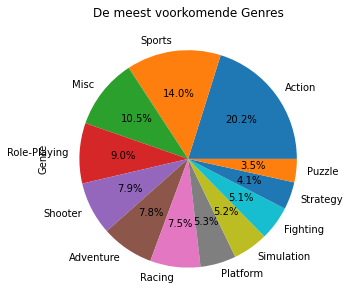

In [416]:
#Vraag 6
pie_data = games['Genre'].value_counts()
pie_plot = pie_data.plot.pie(title = 'De meest voorkomende Genres', figsize=(5,5), autopct = '%3.1f%%')

#Antwoord: Aan de hand van de Pie Chart kunnen we aflezen dat Action de Genre is die het meeste voorkomt

In [417]:
#Vraag 7
games.Rating.value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [418]:
# De meest voorkomende Rating is: 'E', dus die gaan wij gebruiken:

games.loc[games.Rating.isnull(), 'Rating'] = 'E'

In [419]:
#Vraag 8 

games_ML = pd.DataFrame(data = games, columns = ['Year_of_Release', 'Genre', 'Critic_Score'])
games_ML['target'] = games.Global_Sales

In [420]:
#Vraag 9 
games_ML_zonder_missing = games_ML.dropna()
print(games_ML_zonder_missing.shape)
print(games_ML_zonder_missing.notnull().sum())

#Omdat de shape van games_ML_zonder_missing.shape (7983,4) is, en dat overeenkomt met de som van alle not null avlues per kolom,
#zijn alle waarden notnull.

(7983, 4)
Year_of_Release    7983
Genre              7983
Critic_Score       7983
target             7983
dtype: int64


In [421]:
#Vraag 10 ik zal eerst nagaan welke feature niet gebruik wordt. Ik neem aan dat het Genre is, omdat de datatype string is,
#en de ML_algoritmes moeite zullen hebben hiermee.

In [422]:
games_ML_zonder_missing.Genre.value_counts()

Action          1851
Sports          1165
Shooter          923
Role-Playing     731
Racing           725
Misc             509
Platform         490
Fighting         405
Simulation       348
Adventure        320
Strategy         296
Puzzle           220
Name: Genre, dtype: int64

In [423]:
Action = games_ML_zonder_missing[games_ML_zonder_missing.Genre == 'Action']
Sports = games_ML_zonder_missing[games_ML_zonder_missing.Genre == 'Sports']
Shooter = games_ML_zonder_missing[games_ML_zonder_missing.Genre == 'Shooter']
role_playing = games_ML_zonder_missing[games_ML_zonder_missing.Genre == 'Role-Playing']
Racing = games_ML_zonder_missing[games_ML_zonder_missing.Genre == 'Racing']
Misc = games_ML_zonder_missing[games_ML_zonder_missing.Genre == 'Misc']
Platform = games_ML_zonder_missing[games_ML_zonder_missing.Genre == 'Platform']
Fighting = games_ML_zonder_missing[games_ML_zonder_missing.Genre == 'Fighting']
Simulation = games_ML_zonder_missing[games_ML_zonder_missing.Genre == 'Simulation']
Adventure = games_ML_zonder_missing[games_ML_zonder_missing.Genre == 'Adventure']
Strategy = games_ML_zonder_missing[games_ML_zonder_missing.Genre == 'Strategy']
Puzzle = games_ML_zonder_missing[games_ML_zonder_missing.Genre == 'Puzzle']

games_ML_zonder_missing.Action[games_ML_zonder_missing.Genre] = 1
games_ML_zonder_missing.Sports[games_ML_zonder_missing.Genre] = 2
games_ML_zonder_missing.Shooter[games_ML_zonder_missing.Genre] = 3
games_ML_zonder_missing.role_playing[games_ML_zonder_missing.Genre] = 4
games_ML_zonder_missing.Racing[games_ML_zonder_missing.Genre] = 5
games_ML_zonder_missing.Misc[games_ML_zonder_missing.Genre] = 6
games_ML_zonder_missing.Platform[games_ML_zonder_missing.Genre] = 7
games_ML_zonder_missing.Fighting[games_ML_zonder_missing.Genre] = 8
games_ML_zonder_missing.Simulation[games_ML_zonder_missing.Genre] = 9
games_ML_zonder_missing.Adventure[games_ML_zonder_missing.Genre] = 10
games_ML_zonder_missing.Strategy[games_ML_zonder_missing.Genre] = 11
games_ML_zonder_missing.Puzzle[games_ML_zonder_missing.Genre] = 12


#niet helemaal gelukt helaas

AttributeError: 'DataFrame' object has no attribute 'Action'

In [424]:
games_ML_zonder_missing.head()

,Year_of_Release,Genre,Critic_Score,target
0,2006.0,Sports,76.0,82.53
2,2008.0,Racing,82.0,35.52
3,2009.0,Sports,80.0,32.77
6,2006.0,Platform,89.0,29.80
7,2006.0,Misc,58.0,28.92


In [425]:
#Vraag 11

X=games_ML_zonder_missing
y=games_ML_zonder_missing.target

In [426]:
#Vraag 12
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5987, 4)
(5987,)
(1996, 4)
(1996,)


In [427]:
#Vraag 13

model = tree.DecisionTreeClassifier(random_state=0, max_depth = 3)   #set tree levels with max_depth
model = model.fit(X, y)
model = model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Sports'

In [428]:
#Vraag 14:
y_pred = model.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.